# GEOF 236 Modelling Activity

Write a report of the modelling day, containing at least:

* A short introduction to NP(Z) modelling and the methods we used in doing the exercises <br>
* The answers to all exercises* (figures), including what you observed and why <br>
* Explain everything as if you are explaining it to a fellow student<br>
* A general conclusion of what you have learned through doing the exercises <br>

Do not forget to do spell-checking, put your name(s) on the report and in the file name, and hand them in in pdf format. Working together (f.e., discussing the results) between groups is OK, but make your own plots and write your own text.

Note that you need to pass in order to take the exam.

## N-P Model 

### Three different experiments were carried out with varying Nitrate and Phytoplankton initial concentrations. 

The N-P model in Figure 4.3.4 (Sarmiento & Gruber 2006) has two components whioch require two conservation equations. Some assumptions need to be made in order to simplify the model, such as negligable contribution of mixing and advection and sinking of organic matter. We also assume that the light supply is not limit growth and we use the Michaelis Menten Kineticks as growth rate:

$$ \dfrac{dP(t)}{dt} = P V_{max} \dfrac{N}{K_n + N} - P\lambda_P$$

A steady state solution also requires that the supply of N from P decay must be balanced by the photosynthetic uptake, therefore we add the term $\mu_p$:

$$ \dfrac{dN(t)}{dt} = -P V_{max} \dfrac{N}{K_n + N} + P \mu_p \lambda_P$$

Where the first term in the right hand side is the removal of nitrate from P and the second is the supply due to decay of P. 


#### Experiment 1: Low Nitrogen
The initial values are: <br>
* P$_{t0}$ = 0.003 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>


#### Experiment 2a: High Nitrogen
The initial values are: <br>
* P$_{t0}$ = 0.01 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>

#### Experiment 2b: High Nitrogen
The initial values are: <br>
* P$_{t0}$ = 0.03 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>

First we import the libraries we are going to use

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Change the following line to choose the experiment:
casename = 'NP_model_closed_1.txt' 
#casename = 'NP_model_closed_2a.txt' #For example: this would choose the experiment 2a

file = 'https://raw.githubusercontent.com/xabi94davi/GEOF_236/master/{}'.format(casename) #Load data from GitHub repository
df = pd.read_csv(file, sep = '\s+', header=1) #read file

Text(0.5, 1.0, 'NP_model_closed_1.txt')

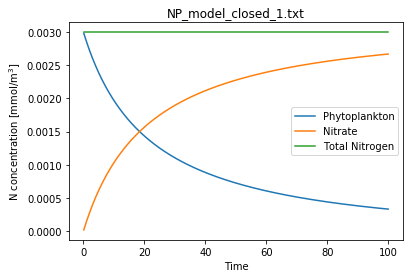

In [5]:
plt.plot(df.time, df.phytoplankton, label = 'Phytoplankton')
plt.plot(df.time, df.nitrate, label='Nitrate')
plt.plot(df.time, df.total_N, label = 'Total Nitrogen')
plt.xlabel('Time')
plt.ylabel('N concentration [mmol/m$^3$]')
plt.legend()
plt.title('{}'.format(casename))

## N-P-Z Model

### Three different experiments were carried out with varying Nitrate, Phytoplankton and Zooplankton initial concentrations. 

Zooplankton grazes on P as follows:

$$ \dfrac{dZ(t)}{dt} = Z \gamma_Z g \dfrac{P}{K_p + P} - Z\lambda_Z$$

Where the first term on the right hand side is the growth of Z and the second is its mortality.  Since the presence of Z affect P, now we also have to modify the equations for P:

$$ \dfrac{dP(t)}{dt} = P V_{max} \dfrac{N}{K_n + N} - P\lambda_P - Zg \dfrac{P}{K_p + P}$$

Same goes for N: 

$$ \dfrac{dN(t)}{dt} = -P V_{max} \dfrac{N}{K_n + N} + Z\mu_Z(1-\gamma_Z)g\dfrac{P}{K_p + P} + \mu_p \lambda_P + Z\mu_Z\lambda_Z $$

#### Experiment 1a: 
The initial values are: <br>
* P$_{t0}$ = 0.03 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>
* Z$_{t0}$ = 0.01 mmol/m$^3$ <br>


#### Experiment 1b:
The initial values are: <br>
* P$_{t0}$ = 1.5 mmol/m$^3$ <br>
* N$_{t0}$ = 0 mmol/m$^3$ <br>
* Z$_{t0}$ = 0.1 mmol/m$^3$ <br>

#### Experiment 1c: 
The initial values are: <br>
* P$_{t0}$ = 2.0 mmol/m$^3$ <br>
* N$_{t0}$ = 1.0 mmol/m$^3$ <br>
* Z$_{t0}$ = 1.0. mmol/m$^3$ <br>

Compare the results to the NP model case 2b!

In [6]:
casename = 'NPZ_model_closed_1a.txt'


file = 'https://raw.githubusercontent.com/xabi94davi/GEOF_236/master/{}'.format(casename)
df = pd.read_csv(file, sep = '\s+', header=1)

Text(0.5, 1.0, 'NPZ_model_closed_1b.txt')

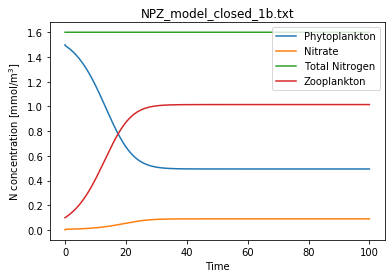

In [7]:
plt.plot(df.time, df.phytoplankton, label = 'Phytoplankton')
plt.plot(df.time, df.nitrate, label='Nitrate')
plt.plot(df.time, df.total_N, label = 'Total Nitrogen')
plt.plot(df.time, df.zooplankton, label = 'Zooplankton')
plt.xlabel('Time')
plt.ylabel('N concentration [mmol/m$^3$]')
plt.legend()
plt.title('{}'.format(casename))